In [225]:
#Ejercicio 1

print("w_2:La función decrede por lo que el parámetro debe incrementarse")
print("w_3:La función decrede por lo que el parámetro debe incrementarse")
print("w_4:La función decrede por lo que el parámetro debe incrementarse")
print("w_52:La función decrede por lo que el parámetro debe incrementarse")
print("w_53:La función decrede por lo que el parámetro debe incrementarse")
print("w_54:La función decrede por lo que el parámetro debe incrementarse")
print("b_2:La función CRECE por lo que el parámetro debe DEcrementarse")
print("b_3:La función decrede por lo que el parámetro debe incrementarse")
print("b_4:La función decrede por lo que el parámetro debe incrementarse")
print("b_5:La función CRECE por lo que el parámetro debe DEcrementarse")


w_2:La función decrede por lo que el parámetro debe incrementarse
w_3:La función decrede por lo que el parámetro debe incrementarse
w_4:La función decrede por lo que el parámetro debe incrementarse
w_52:La función decrede por lo que el parámetro debe incrementarse
w_53:La función decrede por lo que el parámetro debe incrementarse
w_54:La función decrede por lo que el parámetro debe incrementarse
b_2:La función CRECE por lo que el parámetro debe DEcrementarse
b_3:La función decrede por lo que el parámetro debe incrementarse
b_4:La función decrede por lo que el parámetro debe incrementarse
b_5:La función CRECE por lo que el parámetro debe DEcrementarse


In [124]:
#Ejercicio 2
import numpy as np

def f(x):
    return x/(1 + np.exp(-x))

print("f(-2)=",f(-2))
print("f(-1)=",f(-1))
print("f( 1)=",f(1))
print("------------------------")
h=0.0003
print("Derivada de f(-2)=",(f(-2+h)-f(-2))/h)
print("Derivada de f(-1)=",(f(-1+h)-f(-1))/h)
print("Derivada de f(1)=",(f(1+h)-f(1))/h)
print("------------------------")
print("En -2 la función decrece ya que su derivada es negativa y lo hace muy poco ya que su derivada es muy pequeña")
print("En -1 la función crece ya que su derivada es positiva y lo hace muy poco ya que su derivada es muy pequeña")
print("En  1 la función crece mucho ya que su derivada es positiva y lo hace mucho poco ya que su derivada es grande")
print("------------------------")
print("La mínimo está aproximadamente en -1.27846")

f(-2)= -0.2384058440442351
f(-1)= -0.2689414213699951
f( 1)= 0.7310585786300049
------------------------
Derivada de f(-2)= -0.09077673702673207
Derivada de f(-1)= 0.07237484766479489
Derivada de f(1)= 0.9277158621708489
------------------------
En -2 la función decrece ya que su derivada es negativa y lo hace muy poco ya que su derivada es muy pequeña
En -1 la función crece ya que su derivada es positiva y lo hace muy poco ya que su derivada es muy pequeña
En  1 la función crece mucho ya que su derivada es positiva y lo hace mucho poco ya que su derivada es grande
------------------------
La mínimo está aproximadamente en -1.27846


In [191]:
#Código base de varios ejercicios.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

def sigmoid(z):
    return 1/(1 + np.exp(-z))
 
def predict_formula(x,w,b):
    return sigmoid(w*x+b)


def loss_mae(y_true,y_pred):
    error=np.abs(np.subtract(y_true,y_pred))
    mean_error=np.sum(error)/len(y_true)
 
    return mean_error
 
 
 
def loss(x,y_true,w,b):
    y_pred=predict_formula(x,w,b)
  
    return loss_mae(y_true,y_pred)


def plot_loss(x,y_true,perdida_original,valor_parametro_inicial,rango,perdidas,xlabel,axes):
    axes.set_ylim(ymin=0.0,ymax=0.7)
    axes.plot(rango,perdidas)
    axes.scatter(valor_parametro_inicial,perdida_original,color="#ff0000",s=40)
    axes.set_xlabel(xlabel)
    axes.set_ylabel('loss')

    axes.vlines(x = valor_parametro_inicial, ymin = perdida_original, ymax = 0.7,colors = '#ff0000',linestyle="dashed")
    axes.text(valor_parametro_inicial+0.1,0.72,f'{xlabel}={valor_parametro_inicial:0.2f}',c="#ff0000")


    min_x=rango[np.argmin(perdidas)]
    min_y=np.min(perdidas)
    axes.vlines(x = min_x, ymin = 0, ymax = min_y,colors = '#00ff00',linestyle="dashed")
    axes.text(min_x+0.1,0.015,f'{min_x:0.2f}',c="#00ff00")

    
def plot_simple_metrics(axes,history,title):

    axes.plot(history,linestyle="dotted",label=f"loss :{history[-1]:.2f}",c="#003B80")  

    axes.set_xlabel('Nº Épocas', fontsize=13,color="#003B80") 
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))

    axes.set_ylabel('Métricas', fontsize=13,color="#003B80")
    axes.set_ylim(ymin=0,ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    axes.set_title(title)
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=2)
    axes.legend()


def plot_losses(x,y_true,w_inicial,b_inicial,subfigure):
    perdida_original=loss(x,y_true,w_inicial,b_inicial)


    subfigure.suptitle(f'loss={perdida_original:0.2f}',c="#ff0000")
    axes_w=subfigure.add_subplot(1,2,1)
    axes_b=subfigure.add_subplot(1,2,2)   

    rango=np.linspace(-4,4,400)
    perdidas_w=[]
    perdidas_b=[]

    for parametro in rango:
        perdidas_w.append(loss(x,y_true,parametro,b_inicial))
        perdidas_b.append(loss(x,y_true,w_inicial,parametro))


    plot_loss(x,y_true,perdida_original,w_inicial,rango,perdidas_w,"w",axes_w)
    plot_loss(x,y_true,perdida_original,b_inicial,rango,perdidas_b,"b",axes_b)

    return perdida_original


def plot_parametros(x,y_true,parametros):
    figure=plt.figure(figsize=(8,3.5*len(parametros)),layout='constrained')
    figure.suptitle("$y=\\frac{1}{1 + e^{-( w \\cdot x+b  )}}$")
    subfigures = figure.subfigures(nrows=len(parametros)+1, ncols=1)

    history=[]
    for index,(w,b) in enumerate(parametros):
        if (len(parametros)>1):
            subfigure=subfigures[index]
        else:
            subfigure=subfigures

        loss=plot_losses(x,y_true,w,b,subfigure)
        history.append(loss)

    axes=subfigures[-1].add_subplot(1,2,1)
    plot_simple_metrics(axes,history,"loss")


def descenso_gradiente(x,y_true,learning_rate,w,b):
    h=0.000003
 
    gradiente_w =(loss(x,y_true,w+h,b)-loss(x,y_true,w,b))/h
    gradiente_b =(loss(x,y_true,w,b+h)-loss(x,y_true,w,b))/h

    w=w-learning_rate*gradiente_w
    b=b-learning_rate*gradiente_b
    return w,b


def plot_descenso_gradiente(x,y_true,w_inicial,b_inicial,learning_rate,epochs):
    figure=plt.figure(figsize=(8,3.5*epochs),layout='constrained')
    figure.suptitle("$y=\\frac{1}{1 + e^{-( w \\cdot x+b  )}}$")

    subfigures = figure.subfigures(nrows=epochs+1, ncols=1)
    w=w_inicial
    b=b_inicial

    history=[]
    for epoch in range(epochs):
        if (epochs>1):
            subfigure=subfigures[epoch]
        else:
            subfigure=subfigures

        loss=plot_losses(x,y_true,w,b,subfigure)
        history.append(loss)
        w,b=descenso_gradiente(x,y_true,learning_rate,w,b)

    axes=subfigures[-1].add_subplot(1,2,1)
    plot_simple_metrics(axes,history,"loss")

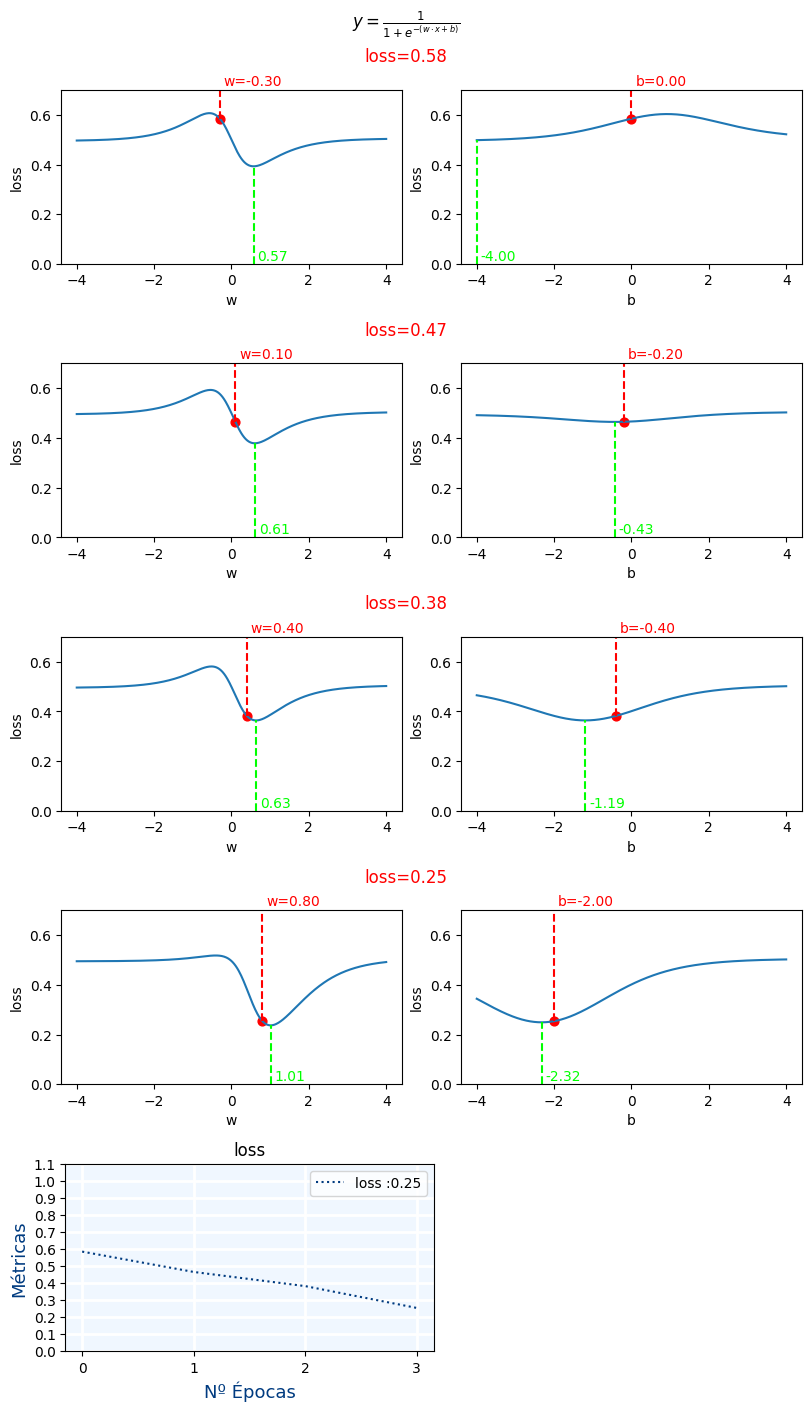

In [190]:
#Ejercicio 3
iris=load_iris()
x=iris.data[0:99,2]
y_true=iris.target[0:99]

parametros=[(-0.3,0),(0.1,-0.2),(0.4,-0.4),(0.8,-2)]
plot_parametros(x,y_true,parametros)



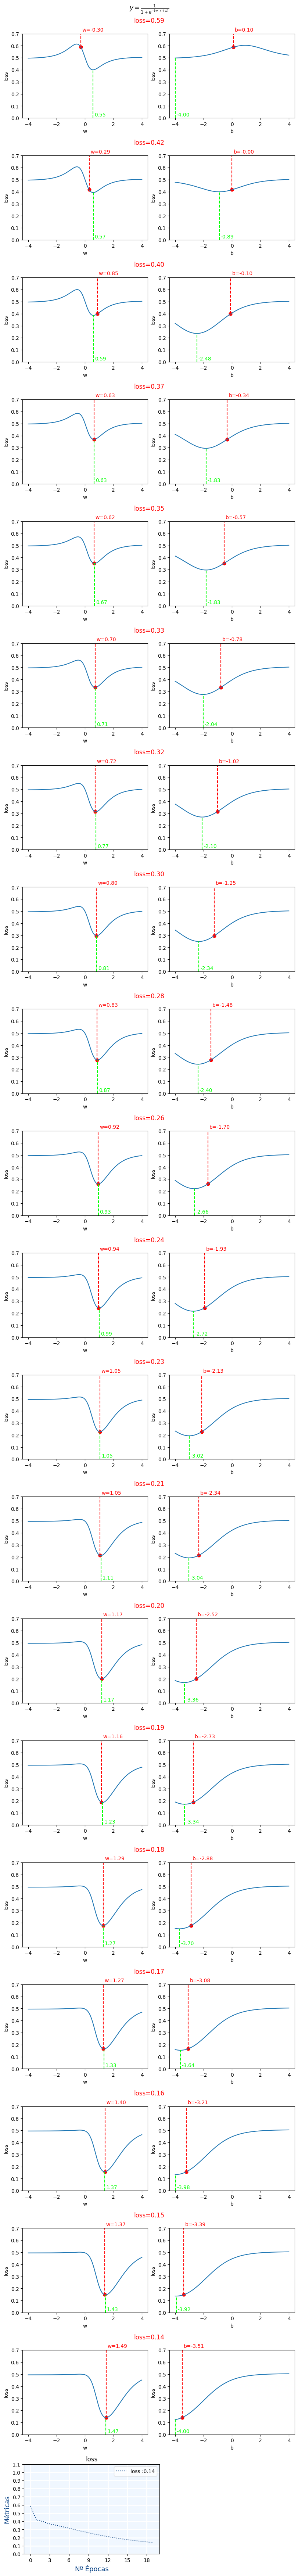

In [192]:
#Ejercicio 4

iris=load_iris()
x=iris.data[0:99,2]
y_true=iris.target[0:99]

w_inicial=-0.3
b_inicial=0.1
learning_rate=3
epochs=20
plot_descenso_gradiente(x,y_true,w_inicial,b_inicial,learning_rate,epochs)  

In [204]:
#Codigo común ejercicio 5

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
import pandas as pd
import seaborn as sns
import math


def plot_metrics(axes,history,title):

    axes.plot(history['loss'],linestyle="dotted",label=f"loss entrenamiento:{history['loss'][-1]:.2f}",c="#003B80")  
    axes.plot(history['val_loss'],linestyle="solid",label=f"loss validación:{history['val_loss'][-1]:.2f}",c="#003B80")

    axes.set_xlabel('Nº Épocas', fontsize=13,color="#003B80") 
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))

    axes.set_ylabel('Métricas', fontsize=13,color="#003B80")
    axes.set_ylim(ymin=0,ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    axes.set_title(title)
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=2)
    axes.legend()

def compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test):

    input_dim=x_train.shape[1]

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
    
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss,optimizer=optimizer)
    
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False) 

    return history,model


from sklearn.datasets import load_iris

def get_datos():
  datos=load_iris()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)


  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  return x_train, x_test, y_train, y_test



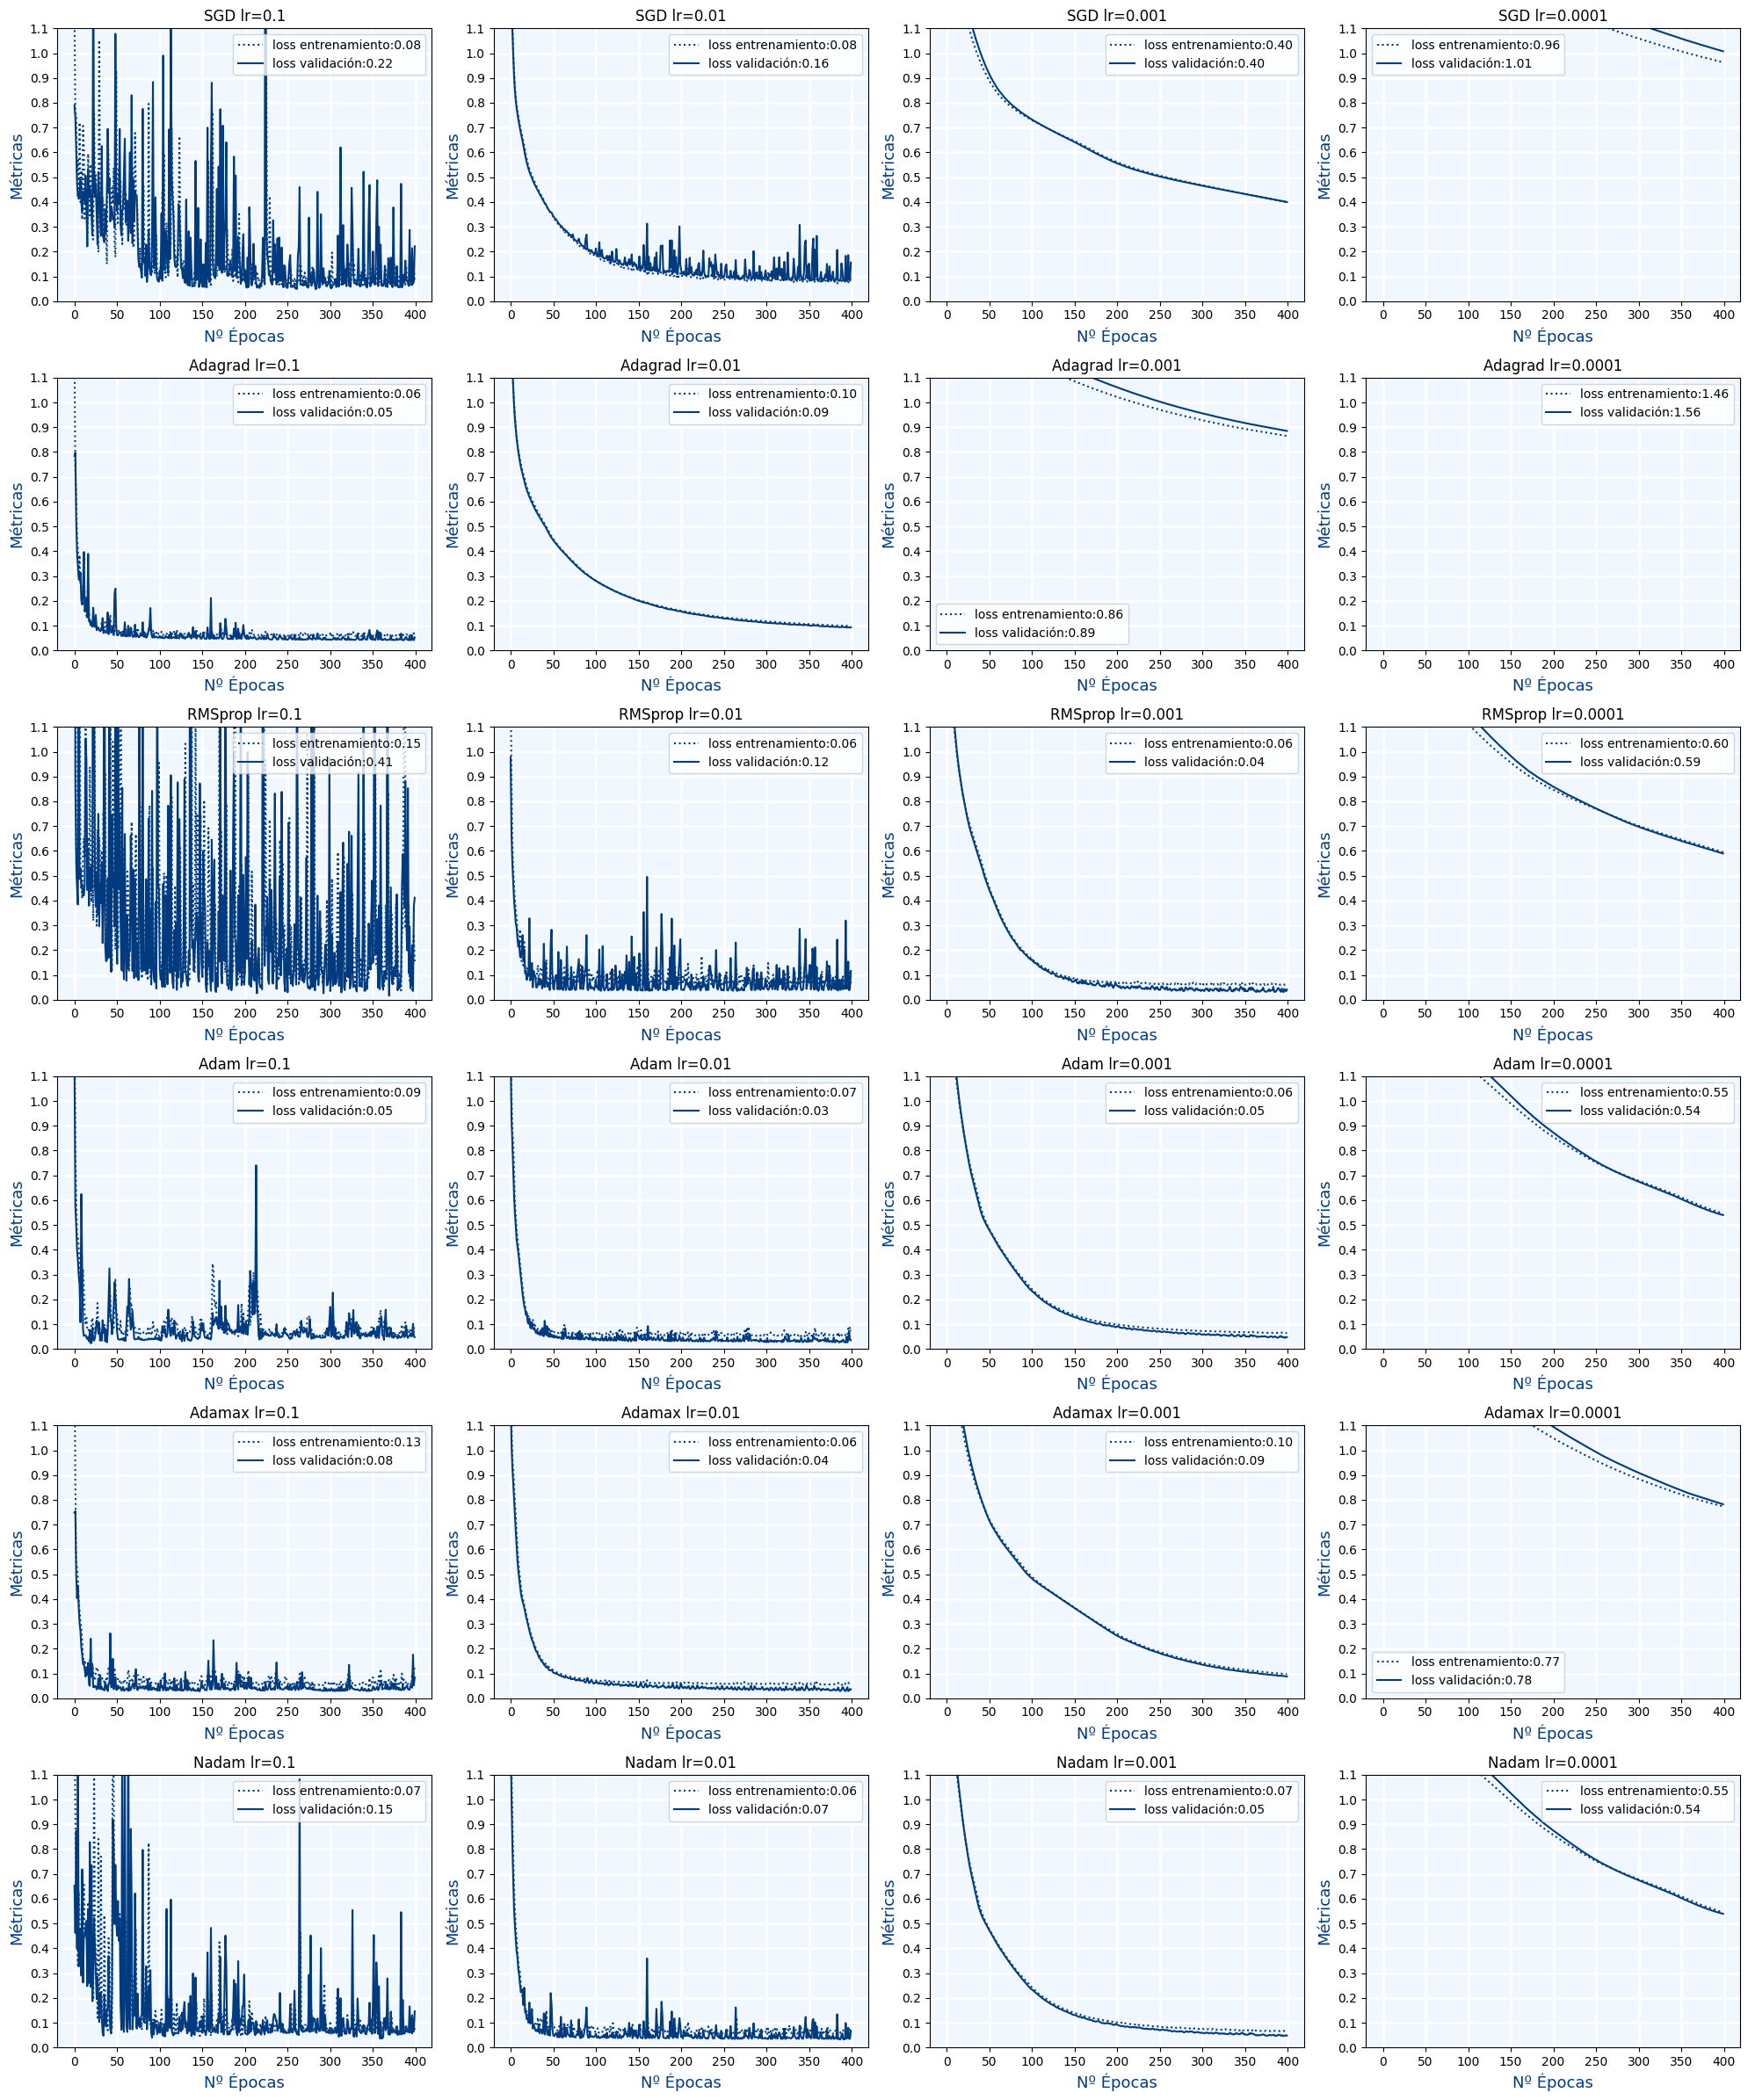

In [161]:
#Ejercicio 5.A
x_train, x_test, y_train, y_test=get_datos()


capas=[4,8,3]
activation="selu"
epochs=400

learning_rates=[0.1,0.01,0.001,0.0001]

optimizers=[
    [tf.keras.optimizers.SGD,"SGD"],
    [tf.keras.optimizers.Adagrad,"Adagrad"],
    [tf.keras.optimizers.RMSprop,"RMSprop"],
    [tf.keras.optimizers.Adam,"Adam"],
    [tf.keras.optimizers.Adamax,"Adamax"],
    [tf.keras.optimizers.Nadam,"Nadam"] 
]

figure=plt.figure(figsize=(5*len(learning_rates), 4*len(optimizers))) 

index=1
for optimizer,caption_optimizer in optimizers:
  for learning_rate in learning_rates:

    history,model=compile_fit(capas,activation,"sigmoid","categorical_crossentropy",optimizer(learning_rate=learning_rate),epochs,x_train, x_test, y_train, y_test)
    axes = figure.add_subplot(len(optimizers),len(learning_rates),index)
    plot_metrics(axes,history.history,f'{caption_optimizer} lr={learning_rate}')


    index=index+1

figure.tight_layout()


print("El mejor optimizador ha sido 'Adamax'")
print("La mejor tasa de aprendizaje ha sido 0.01")
print("Mejores tasa de aprendizaje para cada optimizador:")
print("SGD lr=0.001")
print("Adagrad lr=0.01")
print("RMSprop lr=0.001")
print("Adam lr=0.01")
print("Adamax lr=0.01")
print("Nadam lr=0.001")
print("La tasa de aprendizaje de 0.1 hace que en general las redes sean muy inestables")
print("Las tasa de aprendizaje altas hacen que en general las redes tarden en llegar a valoes bajos de loss")

No eran necesarias 400 épocas, con solo 100 épocas ya convergía Adamax


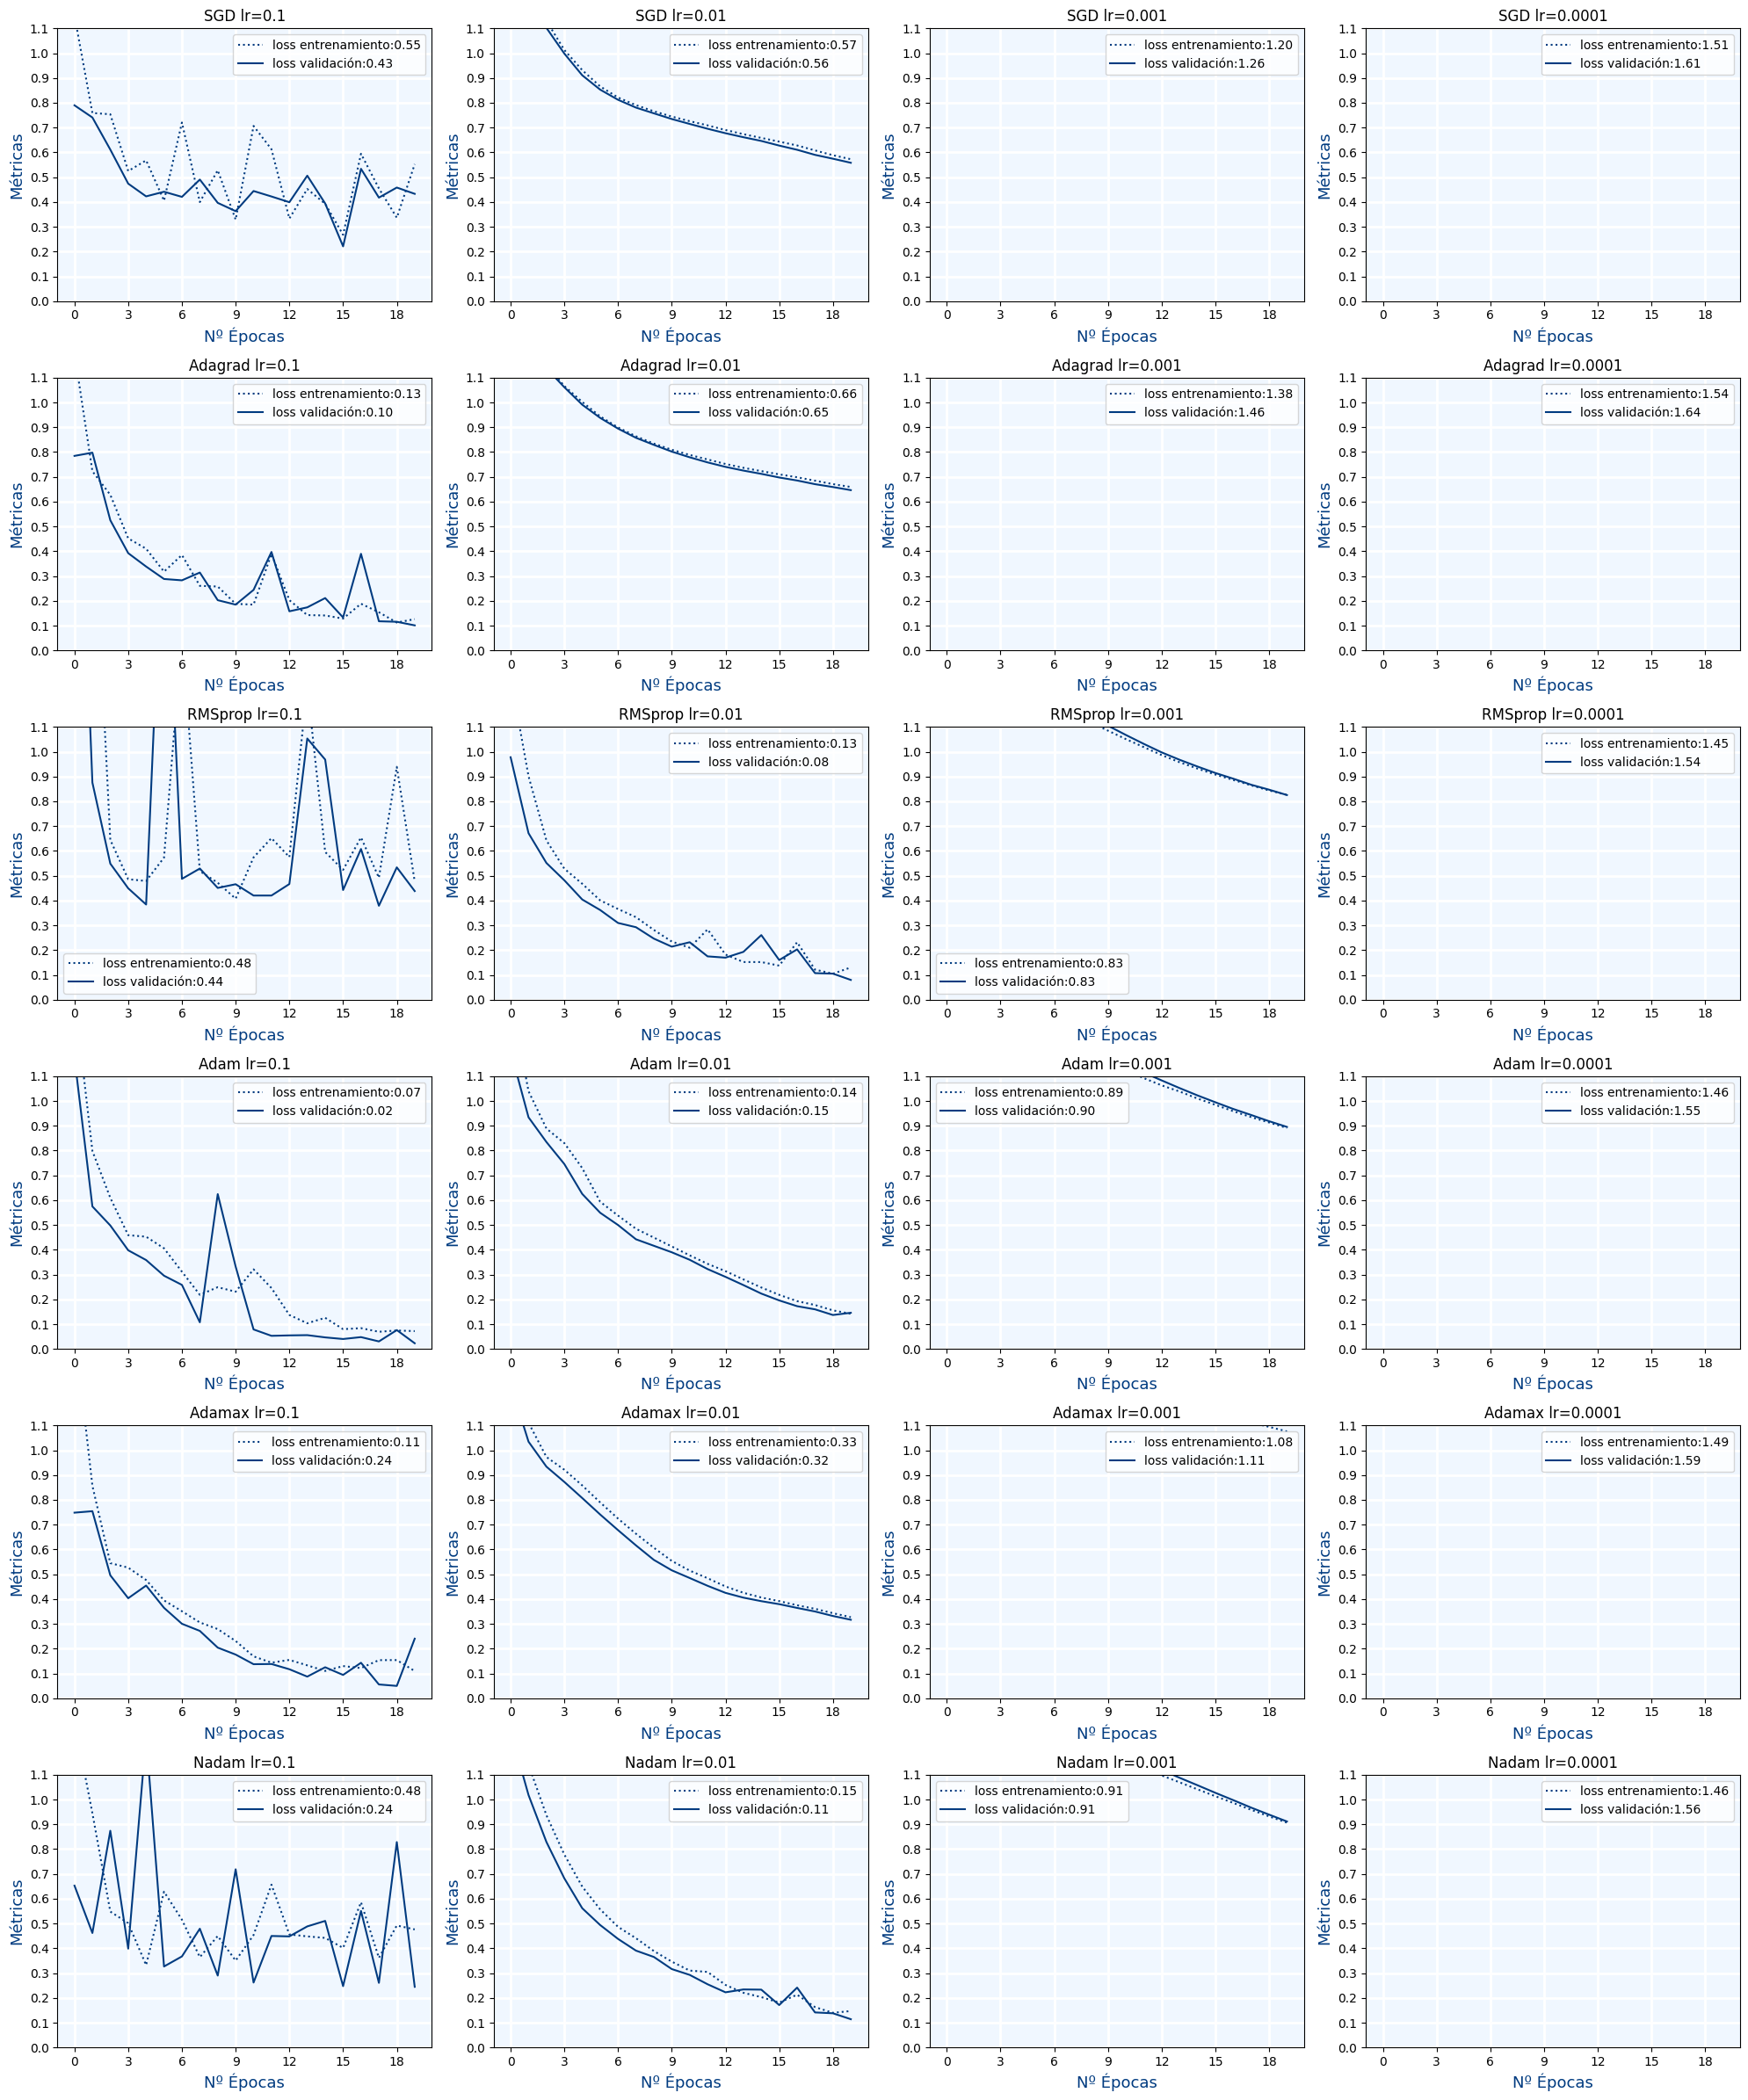

In [185]:
#Ejercicio 5.B
x_train, x_test, y_train, y_test=get_datos()


capas=[4,8,3]
activation="selu"
epochs=20

learning_rates=[0.1,0.01,0.001,0.0001]

optimizers=[
    [tf.keras.optimizers.SGD,"SGD"],
    [tf.keras.optimizers.Adagrad,"Adagrad"],
    [tf.keras.optimizers.RMSprop,"RMSprop"],
    [tf.keras.optimizers.Adam,"Adam"],
    [tf.keras.optimizers.Adamax,"Adamax"],
    [tf.keras.optimizers.Nadam,"Nadam"] 
]

figure=plt.figure(figsize=(5*len(learning_rates), 4*len(optimizers))) 

index=1
for optimizer,caption_optimizer in optimizers:
  for learning_rate in learning_rates:

    history,model=compile_fit(capas,activation,"sigmoid","categorical_crossentropy",optimizer(learning_rate=learning_rate),epochs,x_train, x_test, y_train, y_test)
    axes = figure.add_subplot(len(optimizers),len(learning_rates),index)
    plot_metrics(axes,history.history,f'{caption_optimizer} lr={learning_rate}')


    index=index+1

figure.tight_layout()

print ("Se nota que la tasa de aprendizaje de 0.1 es muy inestable y con la de 0.01 se ve en los optimizadores de RMSprop,Adam,Adamax y Nadam")

SGD,lr=0.1:Da error
SGD,lr=0.01:OK
SGD,lr=0.001:OK
SGD,lr=0.0005:OK
Adagrad,lr=0.1:loss muy alto
Adagrad,lr=0.01:OK
Adagrad,lr=0.001:OK
Adagrad,lr=0.0005:OK
RMSprop,lr=0.1:loss muy alto 
RMSprop,lr=0.01:loss muy alto
RMSprop,lr=0.001:Inestable
RMSprop,lr=0.0005:Inestable
Adam,lr=0.1:loss muy alto
Adam,lr=0.01:Muy Inestable
Adam,lr=0.001:Inestable
Adam,lr=0.0005:OK
Adamax,lr=0.1:loss muy alto
Adamax,lr=0.01:OK
Adamax,lr=0.001:OK
Adamax,lr=0.0005:OK
Nadam,lr=0.1:loss muy alto
Nadam,lr=0.01:Inestable
Nadam,lr=0.001:OK
Nadam,lr=0.0005:OK


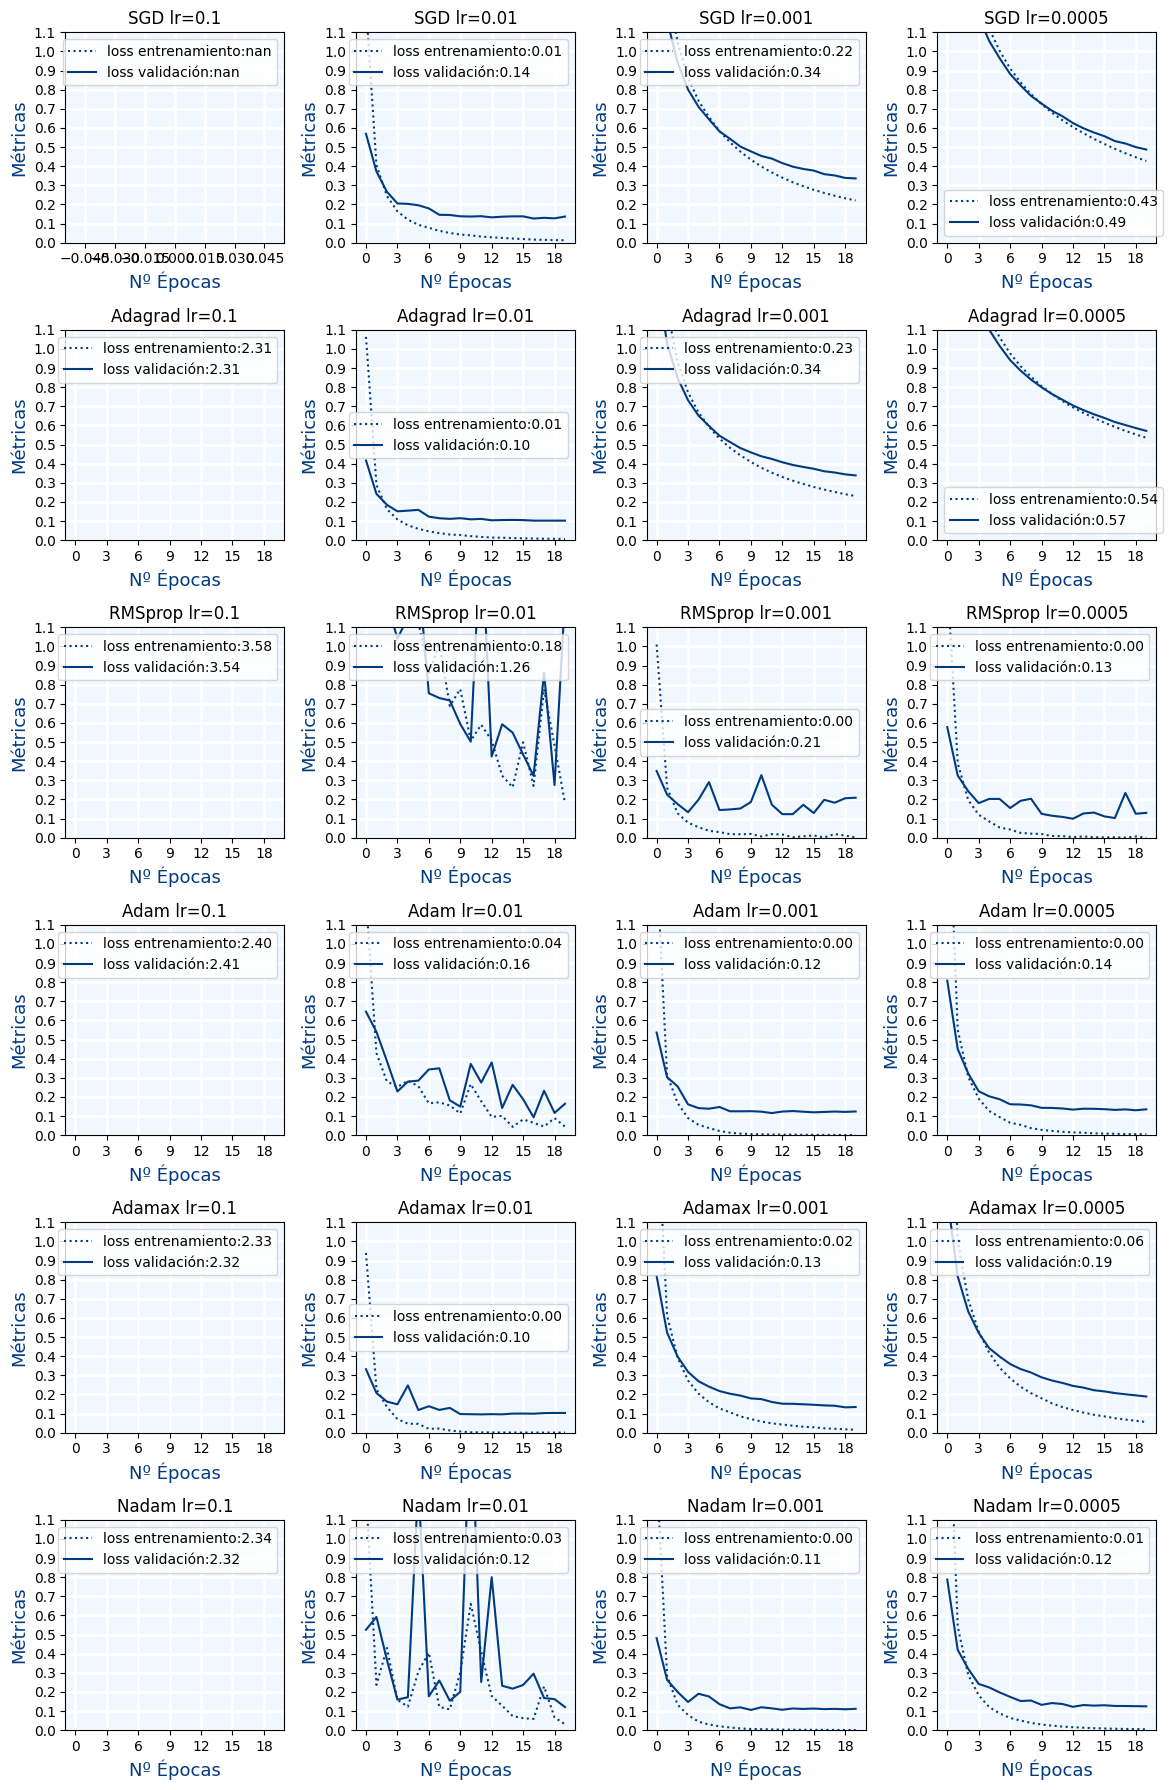

In [209]:
# Ejercicio 6.A 

from sklearn.datasets import load_digits

def get_datos():
  datos=load_digits()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()


capas=[64,128,64,32,16,10]
activation="selu"
epochs=20

learning_rates=[0.1,0.01,0.001,0.0005]
optimizers=[
    [tf.keras.optimizers.SGD,"SGD"],
    [tf.keras.optimizers.Adagrad,"Adagrad"],
    [tf.keras.optimizers.RMSprop,"RMSprop"],
    [tf.keras.optimizers.Adam,"Adam"],
    [tf.keras.optimizers.Adamax,"Adamax"],
    [tf.keras.optimizers.Nadam,"Nadam"] 
]

figure_columns=len(learning_rates)
figure_rows=len(optimizers)

figure=plt.figure(figsize=(3*figure_columns, 3*figure_rows)) 

index=1
for optimizer,caption_optimizer in optimizers:
  for learning_rate in learning_rates:

    history,model=compile_fit(capas,activation,"softmax","categorical_crossentropy",optimizer(learning_rate=learning_rate),epochs,x_train, x_test, y_train, y_test)
    axes = figure.add_subplot(figure_rows,figure_columns,index)
    plot_metrics(axes,history.history,f'{caption_optimizer} lr={learning_rate}')


    index=index+1

figure.tight_layout()


print("SGD,lr=0.1:Da error")
print("SGD,lr=0.01:OK")
print("SGD,lr=0.001:OK")
print("SGD,lr=0.0005:OK")


print("Adagrad,lr=0.1:loss muy alto")
print("Adagrad,lr=0.01:OK")
print("Adagrad,lr=0.001:OK")
print("Adagrad,lr=0.0005:OK")


print("RMSprop,lr=0.1:loss muy alto ")
print("RMSprop,lr=0.01:loss muy alto")
print("RMSprop,lr=0.001:Inestable")
print("RMSprop,lr=0.0005:Inestable")


print("Adam,lr=0.1:loss muy alto")
print("Adam,lr=0.01:Muy Inestable")
print("Adam,lr=0.001:Inestable")
print("Adam,lr=0.0005:OK")


print("Adamax,lr=0.1:loss muy alto")
print("Adamax,lr=0.01:OK")
print("Adamax,lr=0.001:OK")
print("Adamax,lr=0.0005:OK")


print("Nadam,lr=0.1:loss muy alto")
print("Nadam,lr=0.01:Inestable")
print("Nadam,lr=0.001:OK")
print("Nadam,lr=0.0005:OK")


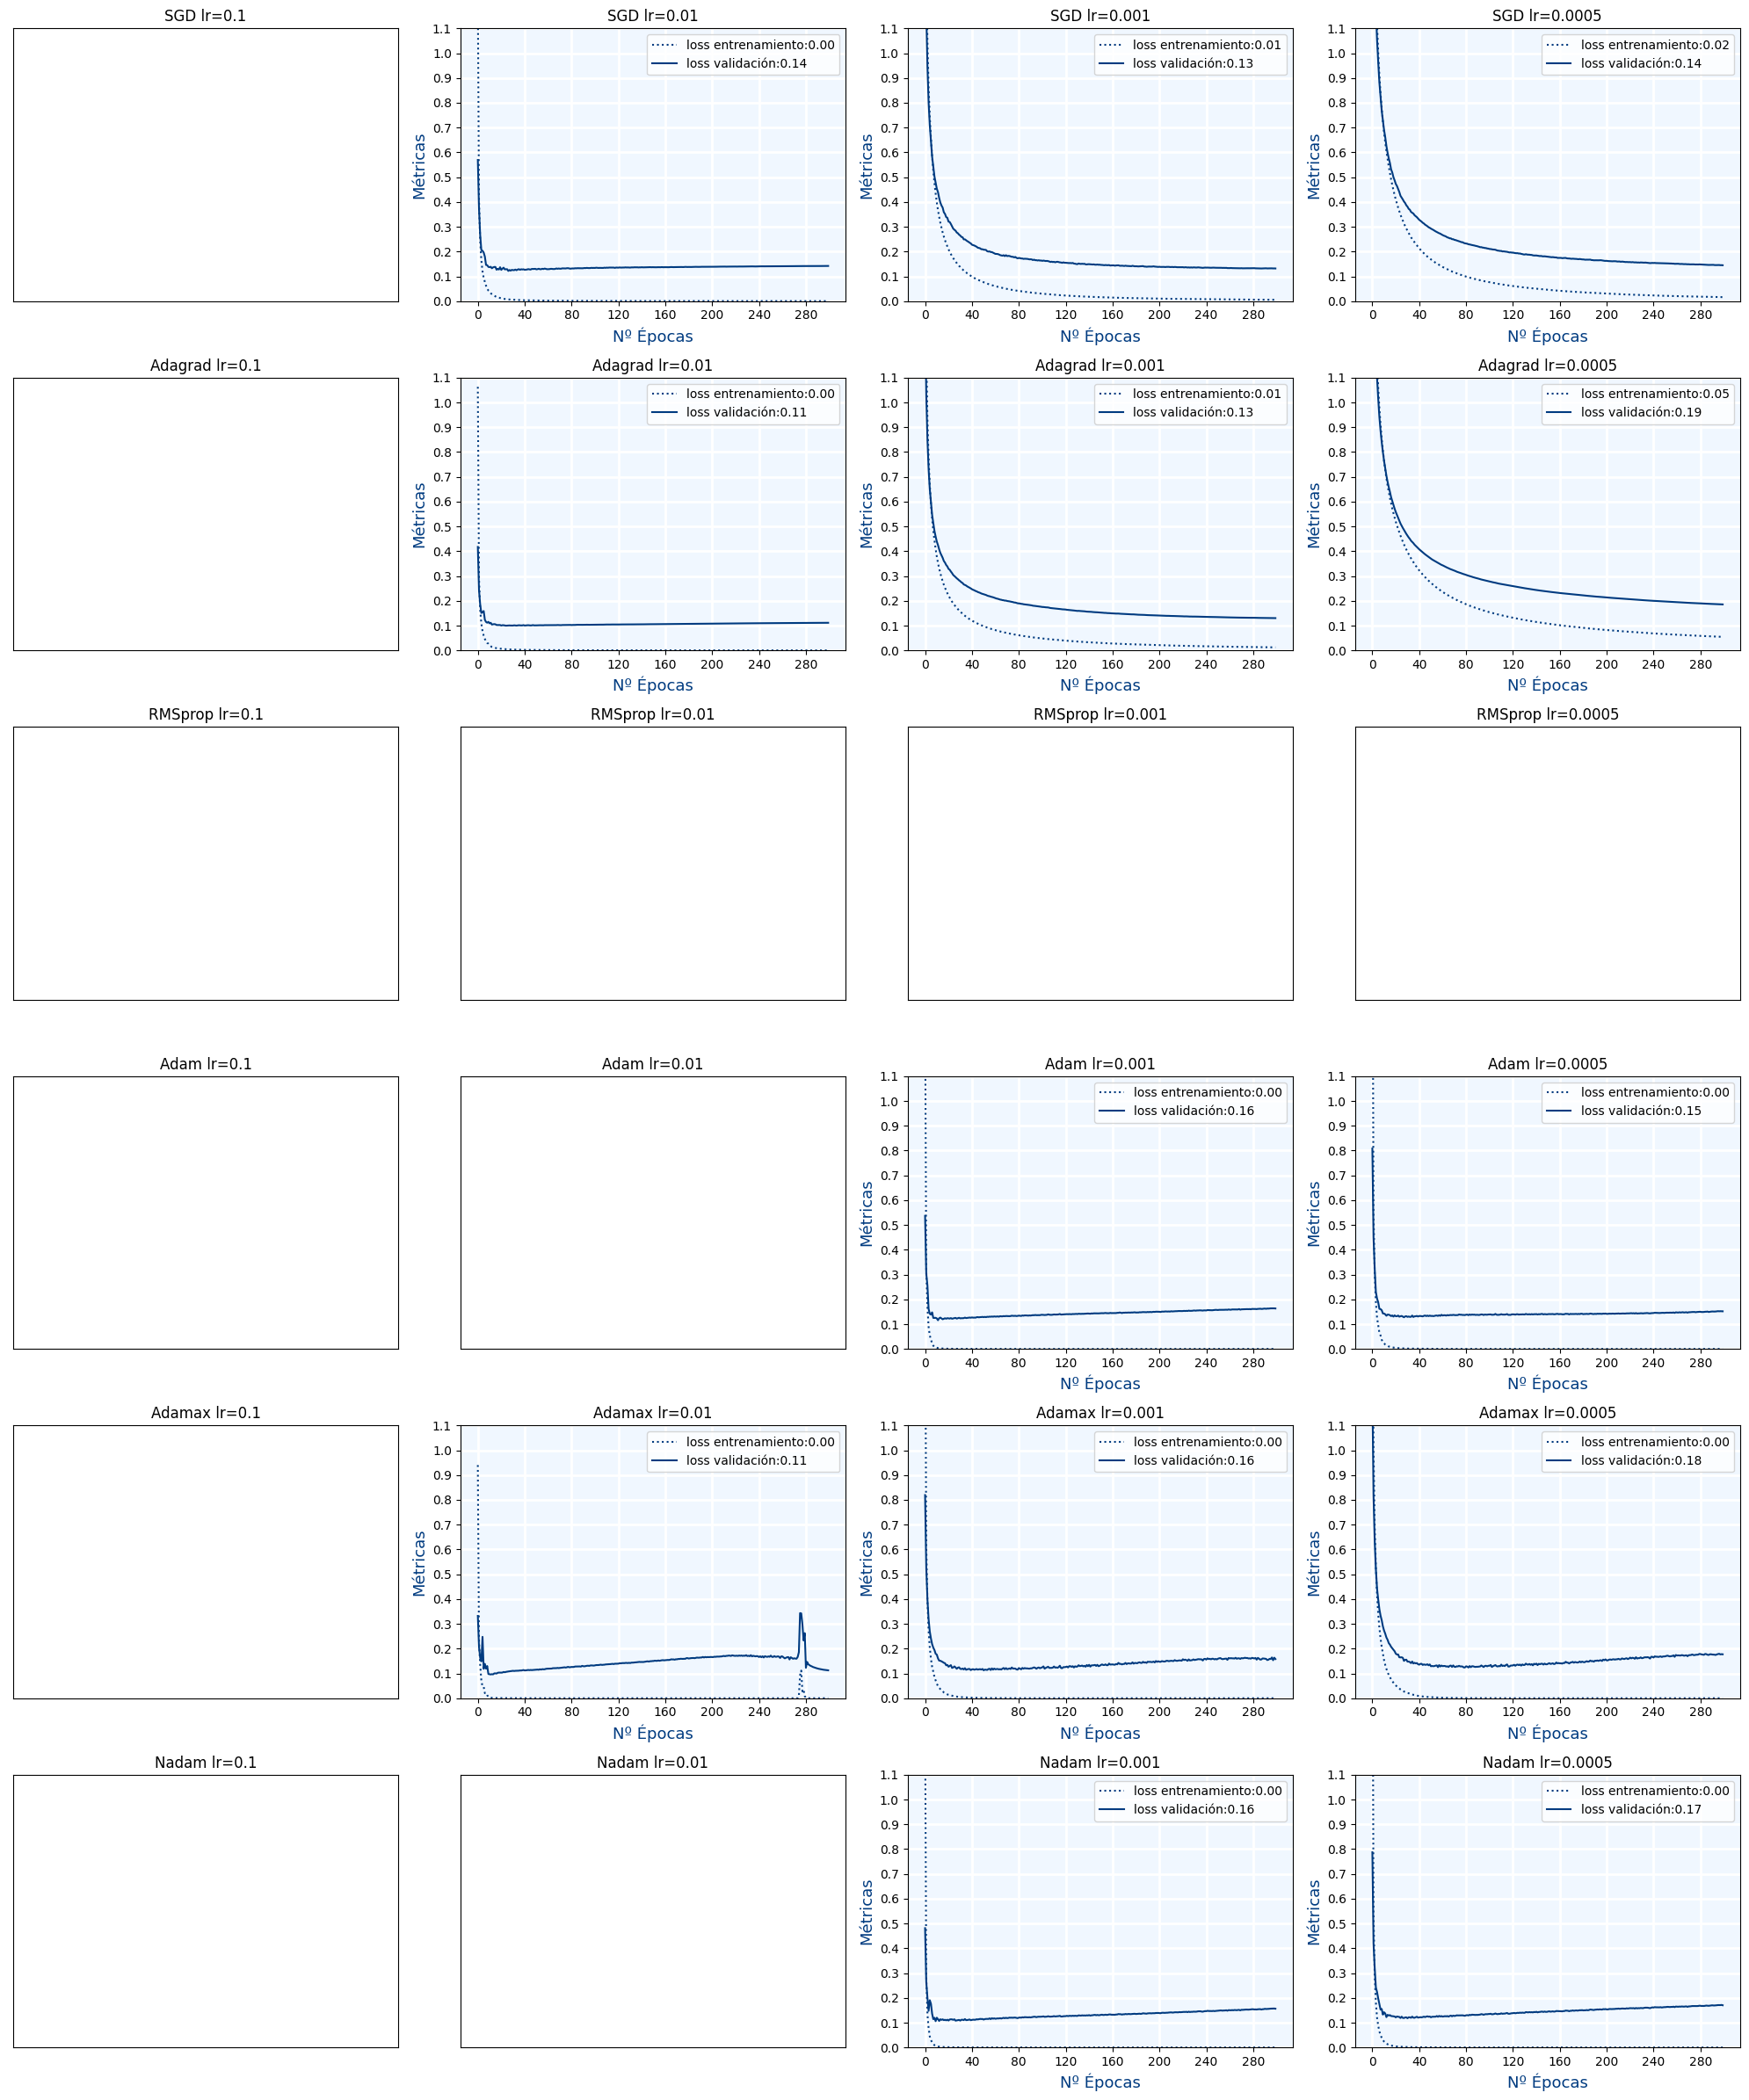

In [224]:
# Ejercicio 6.B

from sklearn.datasets import load_digits

def get_datos():
  datos=load_digits()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()


capas=[64,128,64,32,16,10]
activation="selu"
epochs=300


learning_rates=[0.1,0.01,0.001,0.0005]
optimizers=[
    [tf.keras.optimizers.SGD,"SGD",[False,True,True,True]],
    [tf.keras.optimizers.Adagrad,"Adagrad",[False,True,True,True]],
    [tf.keras.optimizers.RMSprop,"RMSprop",[False,False,False,False]],
    [tf.keras.optimizers.Adam,"Adam",[False,False,True,True]],
    [tf.keras.optimizers.Adamax,"Adamax",[False,True,True,True]],
    [tf.keras.optimizers.Nadam,"Nadam",[False,False,True,True]] 
]


figure_columns=len(learning_rates)
figure_rows=len(optimizers)

figure=plt.figure(figsize=(5*figure_columns, 4*figure_rows)) 

index=1
for optimizer,caption_optimizer,enable_learning_rates in optimizers:
  for index_lr,learning_rate in enumerate(learning_rates):
    axes = figure.add_subplot(figure_rows,figure_columns,index)
    title=f'{caption_optimizer} lr={learning_rate}'
    if (enable_learning_rates[index_lr]==True):
      history,model=compile_fit(capas,activation,"softmax","categorical_crossentropy",optimizer(learning_rate=learning_rate),epochs,x_train, x_test, y_train, y_test)
      plot_metrics(axes,history.history,title)
    else:
      axes.set_title(title)
      axes.get_xaxis().set_visible(False)
      axes.get_yaxis().set_visible(False)

    index=index+1
  
figure.tight_layout()

La único es que con Adamax,lr=0.01 hizo unas cosas un poco raras y no se detectó


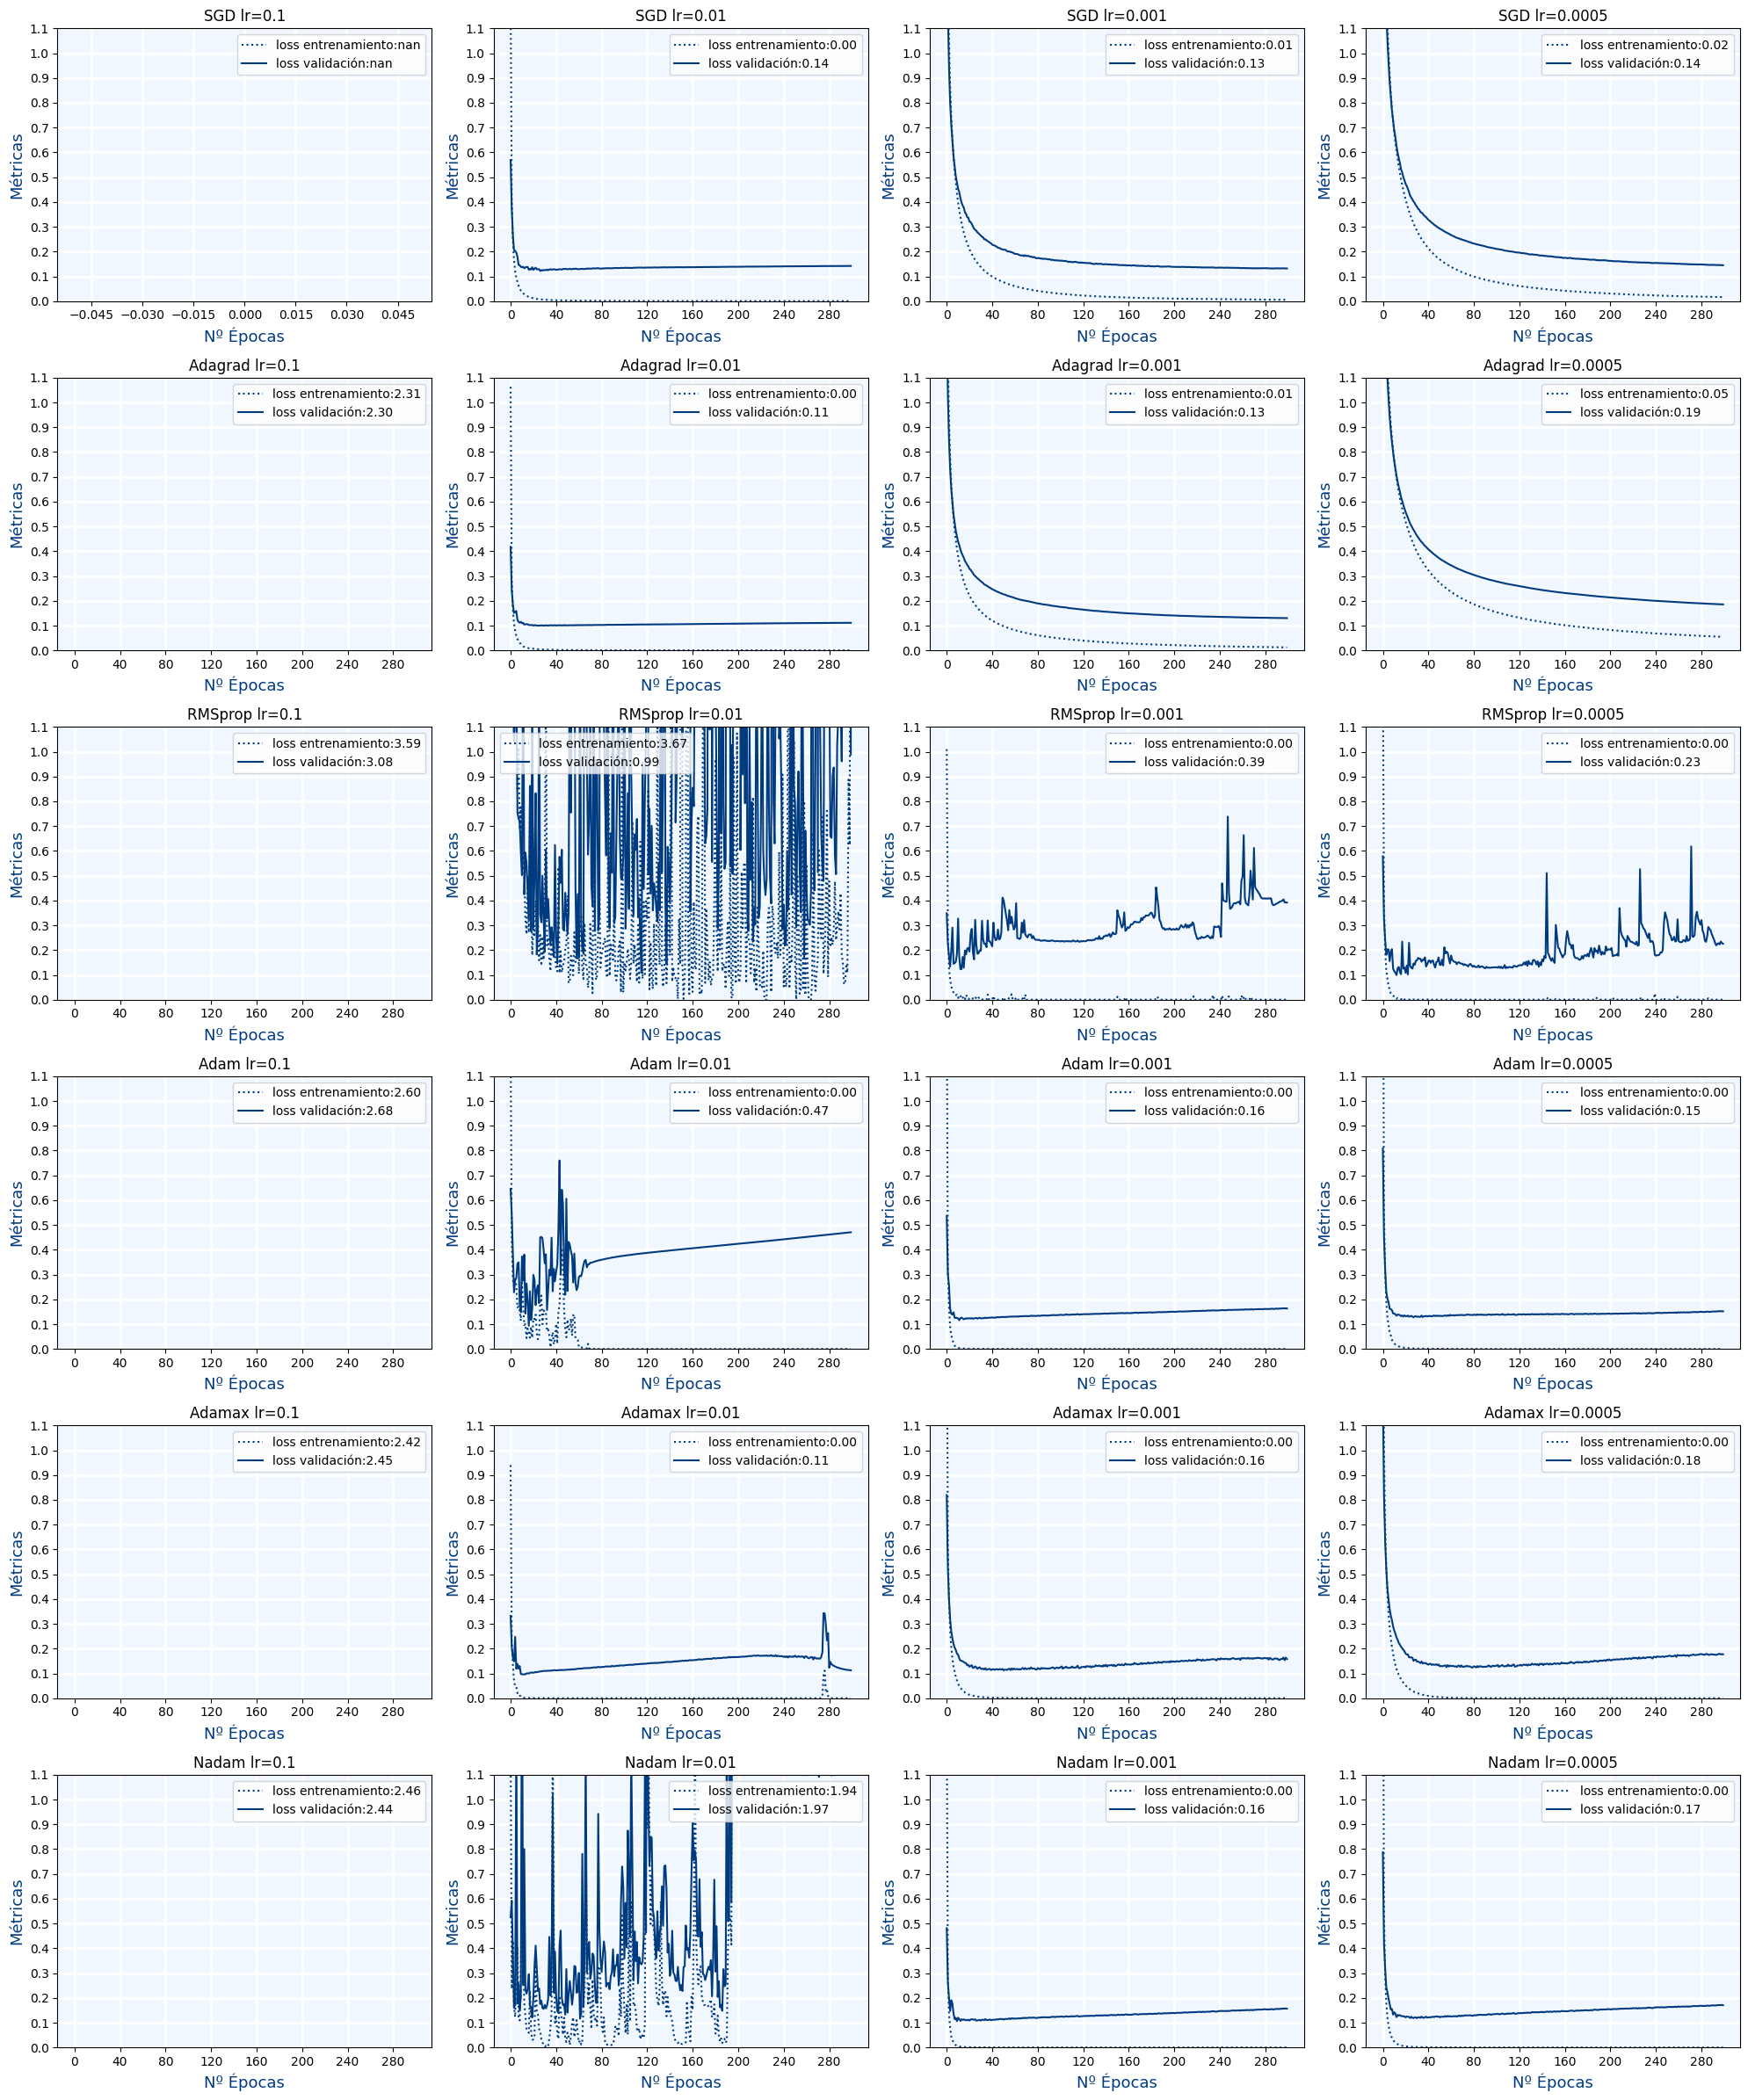

In [211]:
#Ejercicio 6.C

from sklearn.datasets import load_digits

def get_datos():
  datos=load_digits()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()


capas=[64,128,64,32,16,10]
activation="selu"
epochs=300

learning_rates=[0.1,0.01,0.001,0.0005]

optimizers=[
    [tf.keras.optimizers.SGD,"SGD"],
    [tf.keras.optimizers.Adagrad,"Adagrad"],
    [tf.keras.optimizers.RMSprop,"RMSprop"],
    [tf.keras.optimizers.Adam,"Adam"],
    [tf.keras.optimizers.Adamax,"Adamax"],
    [tf.keras.optimizers.Nadam,"Nadam"] 
]

figure=plt.figure(figsize=(5*len(learning_rates), 4*len(optimizers))) 

index=1
for optimizer,caption_optimizer in optimizers:
  for learning_rate in learning_rates:

    history,model=compile_fit(capas,activation,"softmax","categorical_crossentropy",optimizer(learning_rate=learning_rate),epochs,x_train, x_test, y_train, y_test)
    axes = figure.add_subplot(len(optimizers),len(learning_rates),index)
    plot_metrics(axes,history.history,f'{caption_optimizer} lr={learning_rate}')


    index=index+1

figure.tight_layout()

print("La único es que con Adamax,lr=0.01 hizo unas cosas un poco raras y no se detectó")